<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-3/blob/main/Notebooks/Proyecto4x4_rangointercuart%C3%ADlico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

El proyecto de modelado busca seguir la linea de pensamiento de desarrollo de la compañía YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los próximos 4 años. En primordial que este objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforación y adoptar un enfoque más eficiente en la gestión financiera. La compañía ha logrado reducir los tiempos de perforación de aproximadamente un año a 170 días, mediante mejoras técnicas y operativas.

Este plan de transformación busca posicionar a YPF como una empresa más eficiente, rentable y alineada con las tendencias internacionales del sector energético, con una visión clara en el desarrollo del shale en Argentina.

**Modelado**

En la pre entrega 2, realizamos la transformación de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en función al análisis exploratorio que features tener en consideración para el modelado.

Como observamos anteriormente tanto la producción de petróleo como la producción de gas son dos datos que queremos predecir para los próximos 4 años, sin embargo el análisis estará centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales áreas de permiso de concesión tanto para la producción de petróleo como para la producción de gas.

Así como también tenemos que mencionar que el dataset está centrado únicamente en la producción de lo no convencional, es decir, de aquella extracción que requiere tecnologías más avanzadas, costosas o intensivas en recursos debido a las características del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producción de petróleo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian según el tipo de roca y suelen requerir técnicas como la fractura hidráulica (fracking) para su extracción. Mientras que el shale se extrae de la roca sedimentaria rica en materia orgánica que actúa como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.

In [1]:
#descargamos todas las librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df.csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Producción de agua,Profundidad,Mes,Año
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,32,172,0,3844,2025,1
1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2827,2025,1
2,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2977,2025,1
3,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,4092,2025,1
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,55,3,0,4945,2025,1


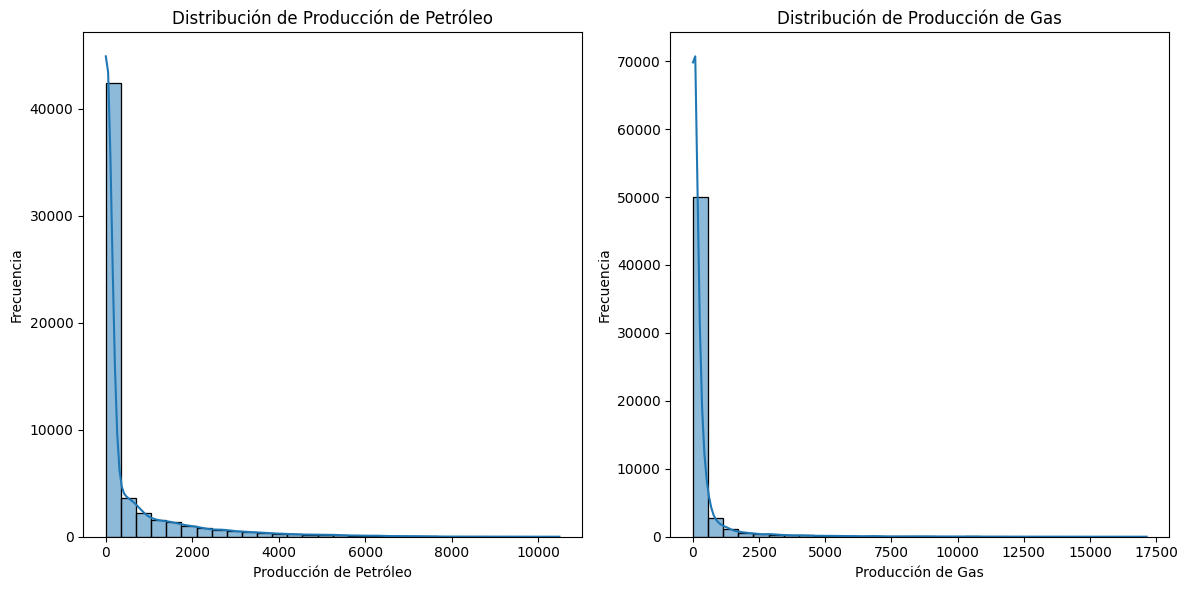

In [6]:
# Histograma para la columna Producción de Petroleo y Producción de gas

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Produccion_ypf['Produccion de Petroleo'], kde=True, bins=30)
plt.title('Distribución de Producción de Petróleo')
plt.xlabel('Producción de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(Produccion_ypf['Produccion de Gas'], kde=True, bins=30)
plt.title('Distribución de Producción de Gas')
plt.xlabel('Producción de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [7]:
# Rango intercuatilico para produccion de petroleo y gas

# Calcular el Rango Intercuartílico (IQR) para la Producción de Petróleo y Gas
Q1_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.25)
Q3_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.75)
IQR_petroleo = Q3_petroleo - Q1_petroleo

Q1_gas = Produccion_ypf['Produccion de Gas'].quantile(0.25)
Q3_gas = Produccion_ypf['Produccion de Gas'].quantile(0.75)
IQR_gas = Q3_gas - Q1_gas

print(f"Rango Intercuartílico para Producción de Petróleo: {IQR_petroleo}")
print(f"Rango Intercuartílico para Producción de Gas: {IQR_gas}")

Rango Intercuartílico para Producción de Petróleo: 343.75
Rango Intercuartílico para Producción de Gas: 236.0


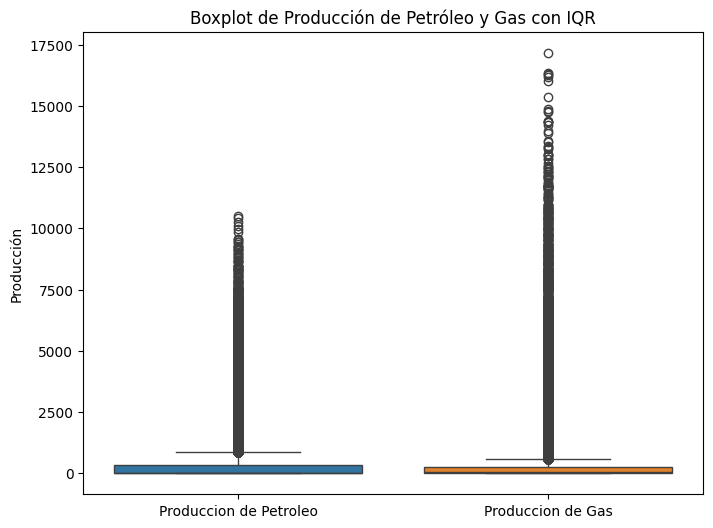

In [8]:
# Gráfico de rangos intercuartilicos anteriores

import matplotlib.pyplot as plt
# Crear un boxplot para visualizar los rangos intercuartílicos
plt.figure(figsize=(8, 6))
sns.boxplot(data=Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']])
plt.title('Boxplot de Producción de Petróleo y Gas con IQR')
plt.ylabel('Producción')
plt.show()

In [9]:
#Calculamos el valor maximo y minimo de produccion de petroleo y gas

max_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].max()
min_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].min()

max_produccion_gas = Produccion_ypf['Produccion de Gas'].max()
min_produccion_gas = Produccion_ypf['Produccion de Gas'].min()

print(f"Valor máximo de producción de petróleo: {max_produccion_petroleo}")
print(f"Valor mínimo de producción de petróleo: {min_produccion_petroleo}")
print(f"Valor máximo de producción de gas: {max_produccion_gas}")
print(f"Valor mínimo de producción de gas: {min_produccion_gas}")

Valor máximo de producción de petróleo: 10489.0
Valor mínimo de producción de petróleo: 0.0
Valor máximo de producción de gas: 17143.0
Valor mínimo de producción de gas: 0.0


In [10]:
#Calculamos la media para produccion de petroleo y produccion de gas con los valores nulos

print("Media para 'Produccion de Petroleo' incluyendo nulos:", Produccion_ypf['Produccion de Petroleo'].mean())
print("Media para 'Produccion de Gas' incluyendo nulos:", Produccion_ypf['Produccion de Gas'].mean())

Media para 'Produccion de Petroleo' incluyendo nulos: 474.9074054379808
Media para 'Produccion de Gas' incluyendo nulos: 341.5692863979581


In [11]:
media_petroleo_sin_ceros = Produccion_ypf['Produccion de Petroleo'][(Produccion_ypf['Produccion de Petroleo'] != 0)].mean()
media_gas_sin_ceros = Produccion_ypf['Produccion de Gas'][(Produccion_ypf['Produccion de Gas'] != 0)].mean()

print(f"Media para 'Produccion de Petroleo' sin ceros: {media_petroleo_sin_ceros}")
print(f"Media para 'Produccion de Gas' sin ceros: {media_gas_sin_ceros}")

Media para 'Produccion de Petroleo' sin ceros: 763.2773836993989
Media para 'Produccion de Gas' sin ceros: 451.33512893177505


**Filtrado de datos mediante IQR (Rango Intercuartílico):**

El código define una función que identifica los valores dentro del rango intercuartílico (entre el primer y tercer cuartil) de una columna, lo que permite eliminar outliers. Luego, se aplica este filtro a las columnas de producción de petróleo y gas, conservando únicamente las filas cuyos valores se encuentren dentro del IQR en ambas variables. Este filtrado mejora la calidad del dataset al reducir el impacto de valores extremos en los modelos predictivos.

In [13]:
# Función para crear un filtro basado en el IQR
def filtrar_por_iqr(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    return columna.between(Q1, Q3)

# Aplicar filtro IQR a las columnas de interés
filtro_petroleo = filtrar_por_iqr(Produccion_ypf['Produccion de Petroleo'])
filtro_gas = filtrar_por_iqr(Produccion_ypf['Produccion de Gas'])

# Conservar solo las filas donde ambas columnas estén dentro del IQR
Produccion_ypf_filtrado = Produccion_ypf[filtro_petroleo & filtro_gas]

In [14]:

Produccion_ypf_filtrado.head(20)


,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Producción de agua,Profundidad,Mes,Año
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,172.0,0.0,3844.0,2025.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,55.0,3.0,0.0,4945.0,2025.0,1.0
8,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,22.0,4.0,3069.0,2025.0,1.0
11,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,20.0,4.0,3155.0,2025.0,1.0
12,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,13.0,21.0,3075.0,2025.0,1.0
14,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,182.0,61.0,3252.0,2025.0,1.0
15,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,18.0,9.0,3050.0,2025.0,1.0
16,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,120.0,0.0,1933.0,2025.0,1.0
17,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,16.0,3.0,3068.0,2025.0,1.0
18,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,22.0,16.0,3060.0,2025.0,1.0


In [15]:
#Con la función columns podemos observar mejor el nombre de todas las columnas del dataset, que en este caso son 47 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Inyección de Agua',
 'Tipo de pozo_Otro tipo',
 'Tipo de pozo_Petrolífero',
 'Tipo de pozo_Sumidero',
 'Tipo de recurso_NO CONVENCIONAL',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_AGUADA DEL CHAÑAR',
 'Area de permiso de concesion_AL NORTE DE LA DORSAL',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BAJO DEL TORO NORTE',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_CERRO ARENA ',
 'Area de permiso de concesion_CERRO LAS MINAS ',
 'Area de permiso de concesion_CERRO MANRIQUE',
 'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
 'Area de permiso de concesion_CN VII A',
 'Area de permiso de concesion_DADIN',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
 'Area de permiso de concesion_FILO MORADO',
 'Area de permiso de conc

In [16]:
#Creamos una copia del dataset original
Produccion_ypf_copia = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()


,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Profundidad,Mes,Año
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.0,172.0,3844.0,2025.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2827.0,2025.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2977.0,2025.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4092.0,2025.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,55.0,3.0,4945.0,2025.0,1.0


In [17]:
Produccion_ypf.astype(int) #aplicamos astype para visualizar los datos en números enteros

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Profundidad,Mes,Año
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,32,172,3844,2025,1
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2827,2025,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2977,2025,1
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,4092,2025,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,55,3,4945,2025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56413,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2046,2024,12
56414,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1642,101,5889,2024,12
56415,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2441,153,0,2024,12
56416,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4491,2024,12


In [18]:
Produccion_ypf.columns.tolist() #Nuevamente aplicamos la función columns para visualizar como quedó el dataset con las columnas eliminadas, ahora son 29 columnas


['Tipo de pozo_Gasífero',
 'Tipo de pozo_Petrolífero',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_LA AMARGA CHICA',
 'Area de permiso de concesion_LA RIBERA BLOQUE I ',
 'Area de permiso de concesion_LA RIBERA BLOQUE II  ',
 'Area de permiso de concesion_LAS MANADAS',
 'Area de permiso de concesion_LAS TACANAS ',
 'Area de permiso de concesion_LOMA AMARILLA SUR',
 'Area de permiso de concesion_LOMA CAMPANA',
 'Area de permiso de concesion_LOMA DEL MOLLE',
 'Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA',
 'Area de permiso de concesion_LOS CALDENES',
 'Area de permiso de concesion_NARAMBUENA',
 'Area de permiso de concesion_OCTOGONO',
 'Area de permiso de concesion_PASO DE LAS BARDAS NORTE',
 'Area de permiso de concesion_RINCON DEL MANGRUL

### **Regresión Lineal**

La regresión lineal es un modelo estadístico utilizado para predecir el valor de una variable dependiente (objetivo) a partir de una o más variables independientes (predictoras). En su forma más simple (regresión lineal simple), ajusta una línea recta a los datos con la fórmula:

𝑦 = 𝑎 + 𝑏 ⋅ 𝑥

donde:

y es la variable dependiente,
x es la variable independiente,
a es la intersección con el eje Y (intercepto),
b es la pendiente de la recta (coeficiente).

In [19]:
Produccion_ypf_copia2 = Produccion_ypf.copy() #es la copia del dataframe nuevo que si contiene Produccion de petróleo y Producción de gas


In [20]:
x = Produccion_ypf_filtrado.drop(['Produccion de Petroleo','Produccion de Gas'], axis=1)

In [21]:
x.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Producción de agua,Profundidad,Mes,Año
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3844.0,2025.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4945.0,2025.0,1.0
8,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3069.0,2025.0,1.0
11,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3155.0,2025.0,1.0
12,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,3075.0,2025.0,1.0


In [22]:
lista_atributos = x.columns

In [23]:
y = Produccion_ypf_filtrado[['Produccion de Petroleo','Produccion de Gas']]

In [24]:
x, y =np.array(x), np.array(y)

In [25]:
x

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 3.844e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.945e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.069e+03, 2.025e+03,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.808e+03, 2.024e+03,
        1.200e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.990e+03, 2.024e+03,
        1.200e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.113e+03, 2.024e+03,
        1.200e+01]])

In [26]:
y[:10]

array([[ 32., 172.],
       [ 55.,   3.],
       [ 10.,  22.],
       [  7.,  20.],
       [ 32.,  13.],
       [  0., 182.],
       [  4.,  18.],
       [  0., 120.],
       [ 36.,  16.],
       [  4.,  22.]])

### **Separando Train-Test**

Antes de entrenar el modelo, dividimos el dataset en dos partes:

1. Conjunto de entrenamiento (train): se utiliza para entrenar el modelo, es decir, para que el algoritmo aprenda la relación entre las variables.

2. Conjunto de prueba (test): se utiliza para evaluar el desempeño del modelo con datos que no ha visto antes, simulando cómo funcionará con datos nuevos.

Esto es importante para evitar el sobreajuste (overfitting), que ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien.

In [27]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [29]:
x.shape

(20624, 45)

In [30]:
X_train.shape

(16499, 45)

In [31]:
y_test.shape

(4125, 2)

In [32]:
X_test.shape

(4125, 45)

In [33]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

### **Análisis de Boxplot**

El gráfico muestra la distribución de los residuos del modelo para las variables de producción de petróleo y gas. Ambos boxplots permiten identificar la dispersión, la presencia de outliers y la simetría de los errores. Se observa que los residuos presentan una concentración alrededor del cero, aunque con una cantidad considerable de valores atípicos, especialmente en el caso del petróleo. Esto sugiere que el modelo tiene un buen ajuste general, pero con algunas predicciones alejadas de los valores reales.



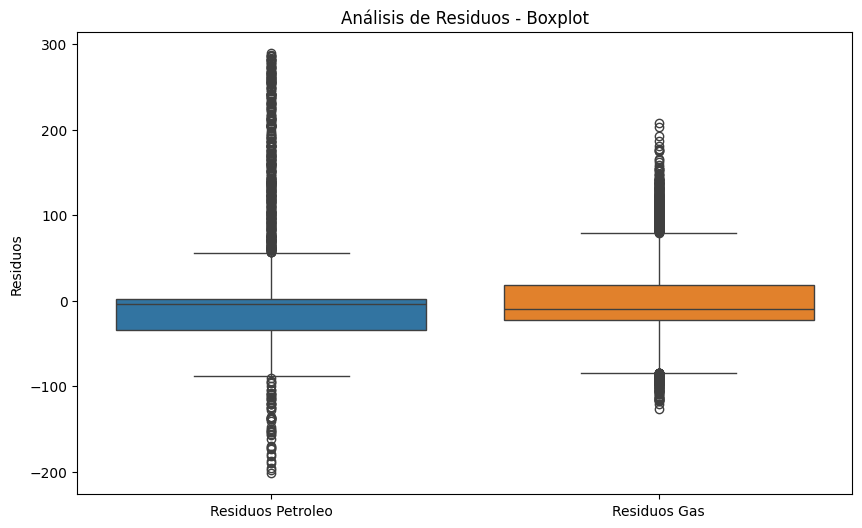

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_df = pd.DataFrame(residuals, columns=['Residuos Petroleo', 'Residuos Gas'])

# Crear boxplots para los residuos
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df)
plt.title('Análisis de Residuos - Boxplot')
plt.ylabel('Residuos')
plt.show()

**Producción de Petróleo Real vs. Predicha**

El gráfico de dispersión compara los valores reales de producción de petróleo con las predicciones generadas por el modelo de Regresión Lineal. Idealmente, los puntos deberían alinearse en una diagonal (y = x), lo que indicaría una predicción perfecta. Sin embargo, se observa una dispersión significativa y patrones de agrupamiento en ciertos valores predichos, lo que sugiere que el modelo tiene dificultades para capturar la variabilidad completa de la producción real.

**Producción de Gas Real vs. Predicha**

Este gráfico de dispersión compara los valores reales de producción de gas con las predicciones realizadas por un modelo de regresión lineal. Se aprecia una dispersión notable y la presencia de bandas horizontales, lo que indica que el modelo tiende a predecir valores concentrados en ciertos rangos fijos, sin capturar adecuadamente la variabilidad de los datos reales. Esto sugiere limitaciones en la capacidad predictiva del modelo lineal para este problema.

**Distribución de los Errores de Predicción**

El gráfico muestra la distribución de los errores de predicción para los modelos aplicados a la producción de petróleo y gas. En ambos casos, los errores se concentran alrededor del cero, lo cual es deseable, aunque con una ligera asimetría y la presencia de outliers. La curva de densidad sugiere que los errores del modelo de gas presentan una distribución más suave, mientras que los del petróleo muestran mayor dispersión y picos anómalos, lo que podría indicar sobreajuste o errores sistemáticos en ciertos rangos.

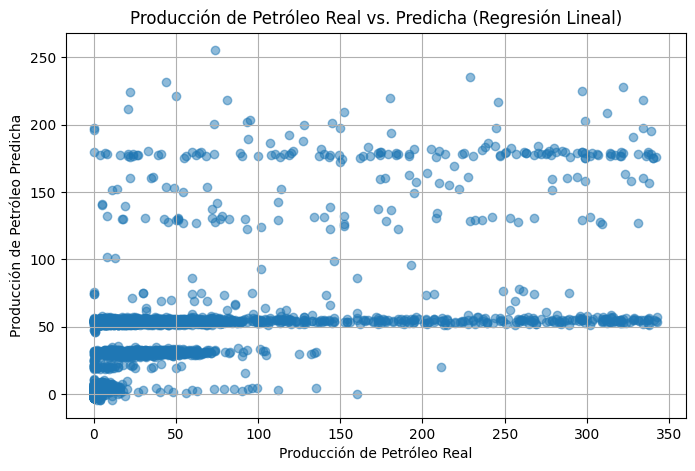

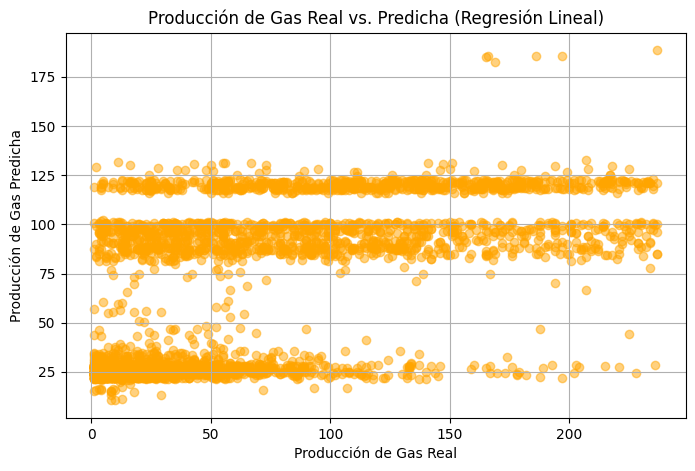

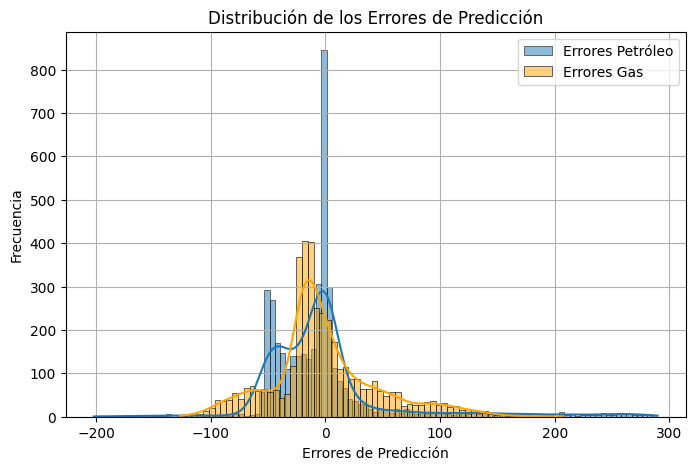

In [61]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (Regresión Lineal)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (Regresión Lineal)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo = y_test[:, 0] - y_pred[:, 0]
errors_gas = y_test[:, 1] - y_pred[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción')
plt.legend()
plt.grid(True)
plt.show()


### **Random Forest**

Random Forest es un modelo de aprendizaje supervisado basado en un conjunto de árboles de decisión. Combina múltiples árboles para mejorar la precisión y reducir el sobreajuste. Es robusto, maneja bien grandes volúmenes de datos y es ideal para capturar relaciones no lineales entre variables.

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=25, n_estimators=20,max_depth=5,max_features='sqrt')

In [38]:
# Entreno el modelo
regresor.fit(X_train, y_train);

In [39]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}

In [40]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

y_pred


array([[ 17.3  ,  14.25 ],
       [ 18.825, 111.5  ],
       [ 27.55 , 125.025],
       ...,
       [  0.15 ,  81.95 ],
       [ 22.05 ,  16.1  ],
       [  0.7  ,  80.625]])

**Error Absoluto Medio (MAE) - Random Forest:**

El modelo Random Forest aplicado a la predicción de producción de petróleo y gas presentó un MAE de 28.99, lo que indica que, en promedio, las predicciones se desvían aproximadamente 29 unidades del valor real. Este valor brinda una medida clara y directa del desempeño del modelo en términos de precisión, siendo útil para evaluar su capacidad de generalización.

In [41]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

28.999415151515162

In [42]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: inf%


<ipython-input-42-603633143>:1: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


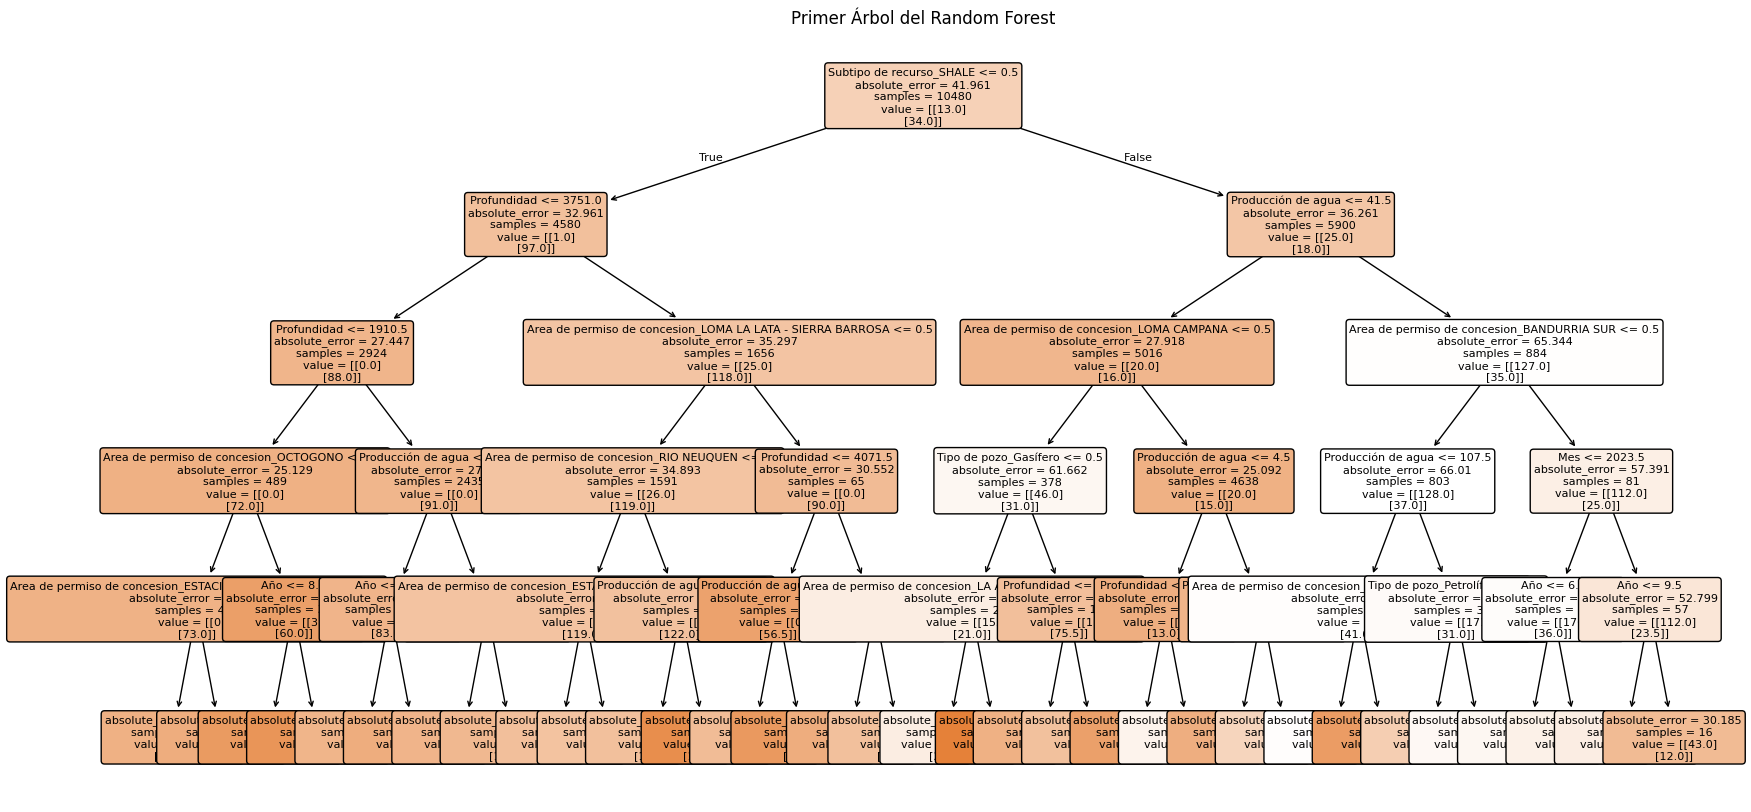

In [43]:
#Gráfico de árbol

import matplotlib.pyplot as plt
!pip install scikit-learn matplotlib

from sklearn.tree import plot_tree

# Asumo que ya tienes un modelo de RandomForestRegressor entrenado llamado 'regresor'
# y que 'lista_atributos' contiene los nombres de las características.

# Asegúrate de que el modelo es un RandomForestRegressor
if isinstance(regresor, RandomForestRegressor):
  # Visualiza el primer árbol del bosque
  plt.figure(figsize=(20, 10))
  plot_tree(regresor.estimators_[0],
            feature_names=lista_atributos.tolist(),  # Asegúrate de que sea una lista
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title("Primer Árbol del Random Forest")
  plt.show()
else:
  print("El modelo 'regresor' no es un RandomForestRegressor.")

### **Support Vector Machine**

SVM es un algoritmo de aprendizaje supervisado que busca encontrar el hiperplano óptimo que separa los datos de distintas clases (o ajusta una función en regresión) maximizando el margen entre los puntos más cercanos. Es eficaz en espacios de alta dimensión y especialmente útil cuando existe una clara separación entre clases o patrones.

In [44]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [45]:
multi_svr = MultiOutputRegressor(SVR())
multi_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [46]:
multi_svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

In [47]:
y_pred_svr = multi_svr.predict(X_test)

y_pred_svr

array([[14.5947956 , 34.40914382],
       [25.81876104, 34.82613575],
       [25.82800622, 34.82446995],
       ...,
       [11.37949073, 34.3005936 ],
       [15.72471434, 34.44782632],
       [-0.59301535, 33.94742457]])

El modelo SVM arrojó un MAE de 39.79, lo que indica que las predicciones difieren en promedio casi 40 unidades respecto a los valores reales. Este valor sugiere que, en este caso, el rendimiento del modelo fue menos preciso que otros enfoques,

In [48]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

39.78669041775291

**Producción de Petróleo Real vs. Predicha (SVR)**

El gráfico de dispersión muestra la relación entre los valores reales de producción de petróleo y las predicciones generadas por un modelo Support Vector Regression (SVR). Se observa que muchas predicciones se agrupan en ciertos niveles fijos, lo que indica una limitada capacidad del modelo para capturar la variabilidad del dato real. Esto se alinea con el MAE elevado (39.79), sugiriendo que el modelo no logra generalizar adecuadamente en este contexto.

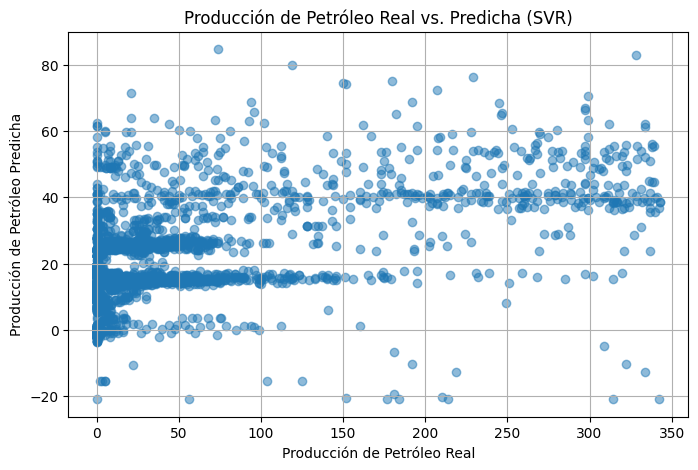

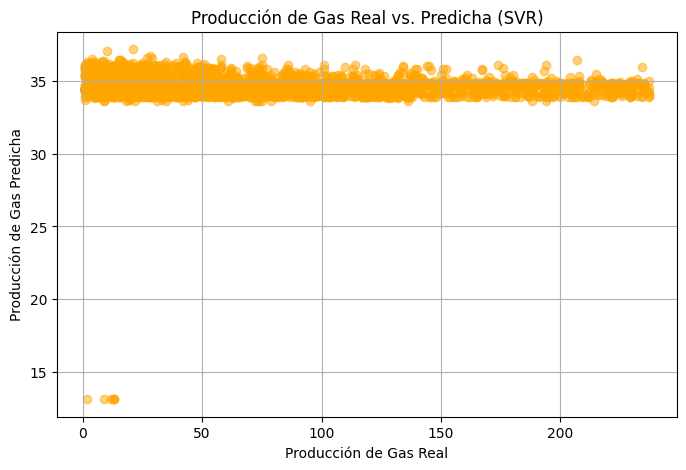

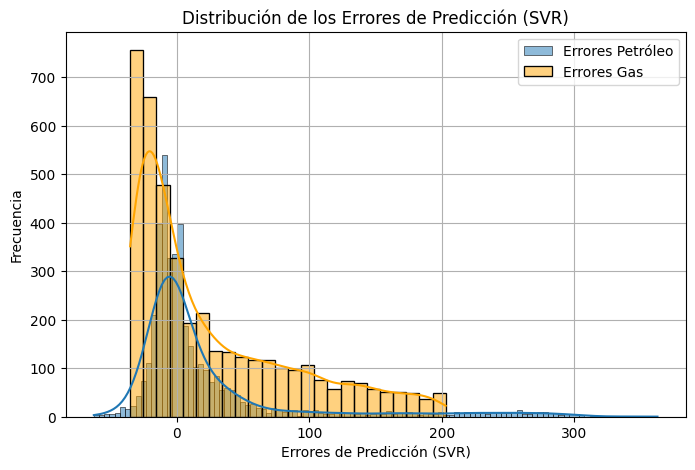

In [62]:
# Gráfico support vector machine

import matplotlib.pyplot as plt
# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred_svr[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred_svr[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo_svr = y_test[:, 0] - y_pred_svr[:, 0]
errors_gas_svr = y_test[:, 1] - y_pred_svr[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo_svr, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas_svr, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción (SVR)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción (SVR)')
plt.legend()
plt.grid(True)
plt.show()

### **XGBoost**

XGBoost es un algoritmo de aprendizaje supervisado basado en árboles de decisión, diseñado para optimizar el rendimiento y la velocidad en tareas de clasificación y regresión. Utiliza boosting, que combina múltiples árboles débiles para crear un modelo fuerte, manejando bien datos grandes y complejos con alta precisión.

In [50]:
from xgboost import XGBRegressor

In [51]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresión
    random_state=42
)

In [52]:
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [53]:
y_pred_xgb = modelo_xgb.predict(X_test)

El modelo XGBoost obtuvo un MAE de 24.05, lo que indica que, en promedio, las predicciones se desvían del valor real en aproximadamente 24 unidades. El RMSE de 39.33 refleja que los errores grandes tienen un peso mayor, mostrando cierta variabilidad en las predicciones. Un R² de 0.64 significa que el modelo explica alrededor del 64% de la variabilidad de los datos, evidenciando un buen ajuste pero con margen para mejorar.

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 24.05456789900532
RMSE: 39.32537157450095
R²: 0.641821690232698


### **Optimización: Gridsearch**

GridSearch es una técnica de optimización que busca automáticamente la mejor combinación de hiperparámetros para un modelo, evaluando exhaustivamente todas las combinaciones posibles dentro de un rango definido. Esto ayuda a mejorar el rendimiento del modelo al encontrar los parámetros que maximizan su precisión o minimizan el error.

In [55]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}


In [56]:
best_model = grid_search.best_estimator_

Al aplicar GridSearch, el MAE disminuyó a 20.59 desde 24.05, lo que indica que las predicciones son más precisas en promedio, con un error absoluto menor. El RMSE también mejoró ligeramente, bajando a 38.44 desde 39.33, mostrando una reducción en la magnitud de errores grandes. Además, el R² aumentó a 0.66 desde 0.64, reflejando un mejor ajuste del modelo y una mayor capacidad para explicar la variabilidad de los datos. En conjunto, GridSearch optimizó el modelo XGBoost, logrando predicciones más precisas y consistentes.

In [57]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 20.59099566229523
RMSE: 38.43533129728304
R²: 0.6613035947283906


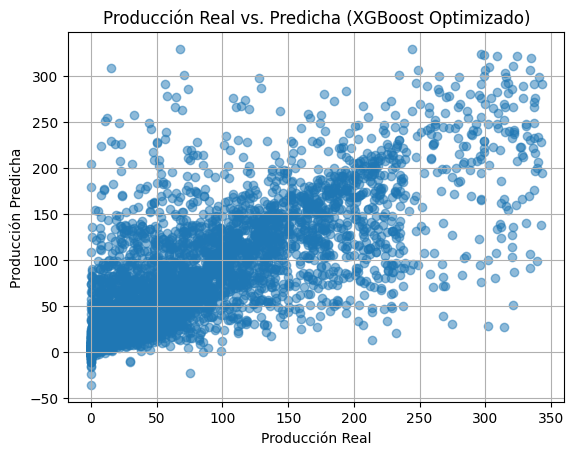

In [58]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Producción Real")
plt.ylabel("Producción Predicha")
plt.title("Producción Real vs. Predicha (XGBoost Optimizado)")
plt.grid(True)
plt.show()

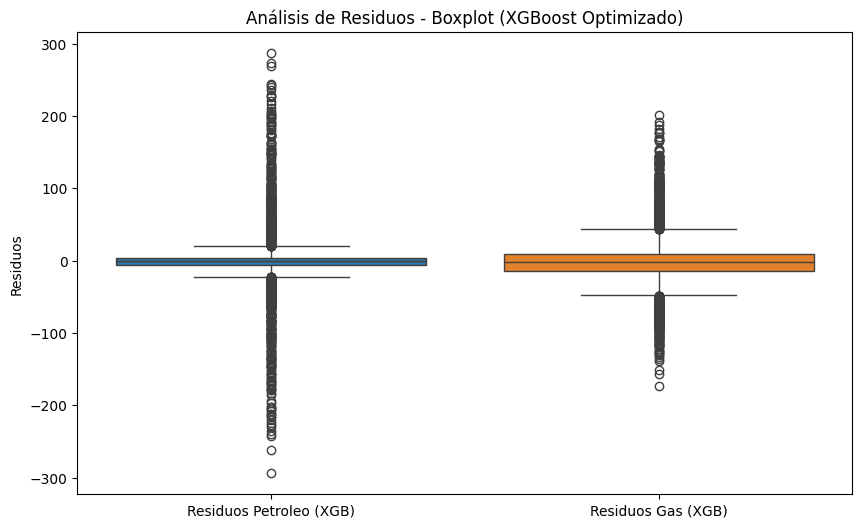

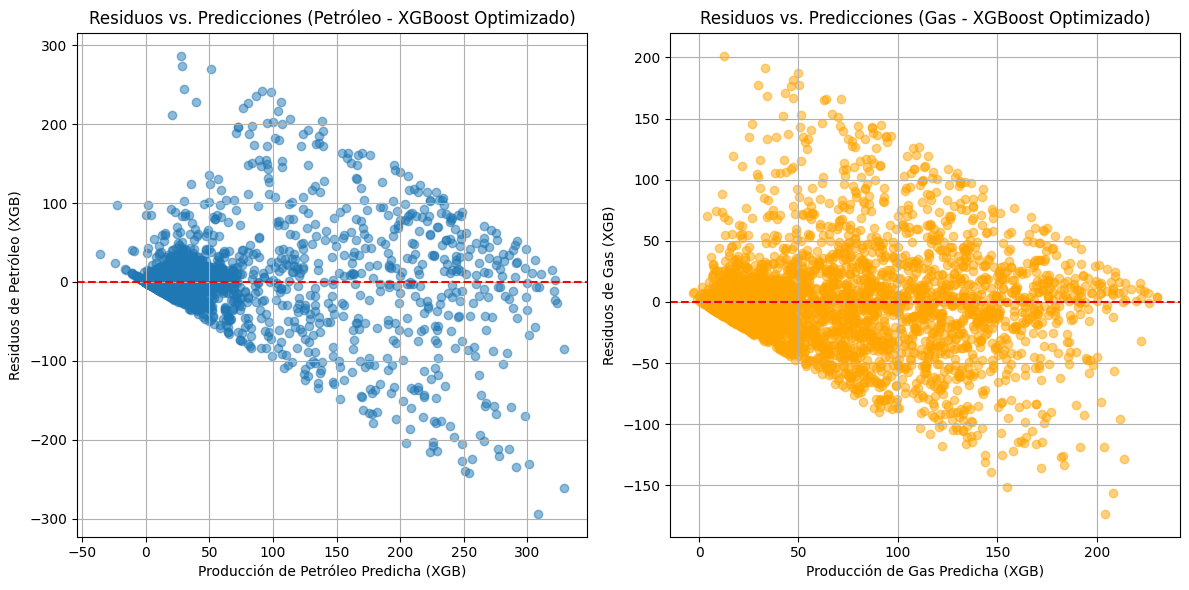

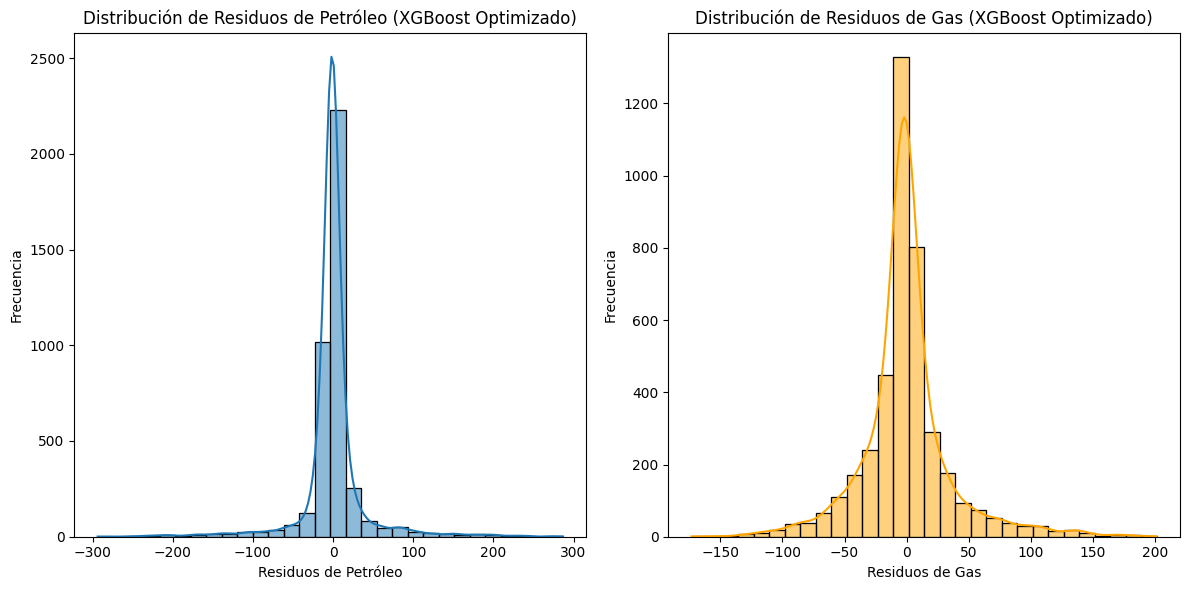

In [59]:
# Gráfico plot de residuos
import pandas as pd
import matplotlib.pyplot as plt
# Calcular los residuos del modelo XGBoost optimizado
residuals_xgb = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_xgb_df = pd.DataFrame(residuals_xgb, columns=['Residuos Petroleo (XGB)', 'Residuos Gas (XGB)'])

# Crear boxplots para los residuos del modelo XGBoost
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_xgb_df)
plt.title('Análisis de Residuos - Boxplot (XGBoost Optimizado)')
plt.ylabel('Residuos')
plt.show()

# Graficar los residuos frente a los valores predichos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], residuals_xgb[:, 0], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Producción de Petróleo Predicha (XGB)')
plt.ylabel('Residuos de Petróleo (XGB)')
plt.title('Residuos vs. Predicciones (Petróleo - XGBoost Optimizado)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], residuals_xgb[:, 1], alpha=0.5, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Producción de Gas Predicha (XGB)')
plt.ylabel('Residuos de Gas (XGB)')
plt.title('Residuos vs. Predicciones (Gas - XGBoost Optimizado)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Histograma de los residuos para ver su distribución
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_xgb[:, 0], kde=True, bins=30)
plt.title('Distribución de Residuos de Petróleo (XGBoost Optimizado)')
plt.xlabel('Residuos de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(residuals_xgb[:, 1], kde=True, bins=30, color='orange')
plt.title('Distribución de Residuos de Gas (XGBoost Optimizado)')
plt.xlabel('Residuos de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()